In [39]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import numpy as np
from typing import List, Dict, Tuple

In [40]:
class ProjectScheduler:
    def __init__(self, file_path):
        self.data = {
            'projects': 0,
            'jobs': 0,
            'horizon': 0,
            'resources': {'renewable': 0, 'nonrenewable': 0},
            'precedence_relations': {},
            'job_details': {},
            'resource_availability': {}
        }
        self.parse_file(file_path)
    
    def parse_file(self, file_path):
        with open(file_path, 'r') as file:
            content = file.read()
        
        # Parse general information
        self.data['projects'] = int(re.search(r'projects:\s*(\d+)', content).group(1))
        self.data['jobs'] = int(re.search(r'jobs \(incl\. supersource/sink \):\s*(\d+)', content).group(1))
        self.data['horizon'] = int(re.search(r'horizon:\s*(\d+)', content).group(1))
        
        # Parse resources
        resources_match = re.search(r'RESOURCES\n  - renewable\s*:\s*(\d+)\s*R\n  - nonrenewable\s*:\s*(\d+)\s*N', content)
        self.data['resources']['renewable'] = int(resources_match.group(1))
        self.data['resources']['nonrenewable'] = int(resources_match.group(2))
        
        # Parse precedence relations
        precedence_section = re.search(r'#Precedence relations(.*?)#Duration', content, re.DOTALL)
        if precedence_section:
            for line in precedence_section.group(1).strip().split('\n')[1:]:
                parts = line.split()
                if len(parts) > 3:  # Garante que há successors
                    job_nr = int(parts[0])
                    successors = [int(succ) for succ in parts[3:]]  # Usa parts[3:] para successors
                    self.data['precedence_relations'][job_nr] = successors

        # Parse job details
        duration_section = re.search(r'#Duration and resources(.*?)#Resource', content, re.DOTALL)
        if duration_section:
            for line in duration_section.group(1).strip().split('\n')[1:]:
                parts = line.split()
                if len(parts) > 2:
                    job_nr = int(parts[0])
                    duration = int(parts[2])
                    resources = {f'R{i+1}': int(parts[3+i]) for i in range(2)}
                    self.data['job_details'][job_nr] = {
                        'duration': duration,
                        'resources': resources
                    }
        
        # Parse resource availability
        availability_section = re.search(r'#Resource availability(.*)', content, re.DOTALL)
        if availability_section:
            for line in availability_section.group(1).strip().split('\n')[1:]:
                parts = line.split()
                if len(parts) > 1:
                    resource = parts[0]
                    quantity = int(parts[1])
                    self.data['resource_availability'][resource] = quantity
    
    def get_project_summary(self):
        return {
            'Total Projects': self.data['projects'],
            'Total Jobs': self.data['jobs'],
            'Time Horizon': self.data['horizon'],
            'Renewable Resources': self.data['resources']['renewable'],
            'Resource Availability': self.data['resource_availability']
        }
    
    def get_job_precedence(self):
        return self.data['precedence_relations']
    
    def get_job_details(self):
        return self.data['job_details']

In [41]:
def create_project_graph(precedence_relations):
    # Cria um grafo direcionado
    G = nx.DiGraph()
    
    # Adiciona arestas baseadas nas relações de precedência
    for job, successors in precedence_relations.items():
        for successor in successors:
            G.add_edge(job, successor)
    
    # Configura o layout do grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Desenha o grafo
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, 
            node_color='lightblue', 
            node_size=500, 
            arrows=True, 
            edge_color='gray')
    
    # Adiciona título
    plt.title("Grafo de Precedência de Tarefas")
    
    # Mostra o grafo
    plt.show()

Resumo do Projeto:
{'Total Projects': 1, 'Total Jobs': 8, 'Time Horizon': 20, 'Renewable Resources': 2, 'Resource Availability': {'R1': 1, 'R2': 2}}

Relações de Precedência:
{1: [2, 3], 2: [4], 3: [4], 5: [6, 7], 6: [8], 7: [8]}

Detalhes das Tarefas:
{1: {'duration': 2, 'resources': {'R1': 1, 'R2': 0}}, 2: {'duration': 3, 'resources': {'R1': 0, 'R2': 1}}, 3: {'duration': 4, 'resources': {'R1': 0, 'R2': 1}}, 4: {'duration': 1, 'resources': {'R1': 0, 'R2': 1}}, 5: {'duration': 2, 'resources': {'R1': 1, 'R2': 0}}, 6: {'duration': 3, 'resources': {'R1': 0, 'R2': 1}}, 7: {'duration': 4, 'resources': {'R1': 0, 'R2': 1}}, 8: {'duration': 1, 'resources': {'R1': 0, 'R2': 1}}}


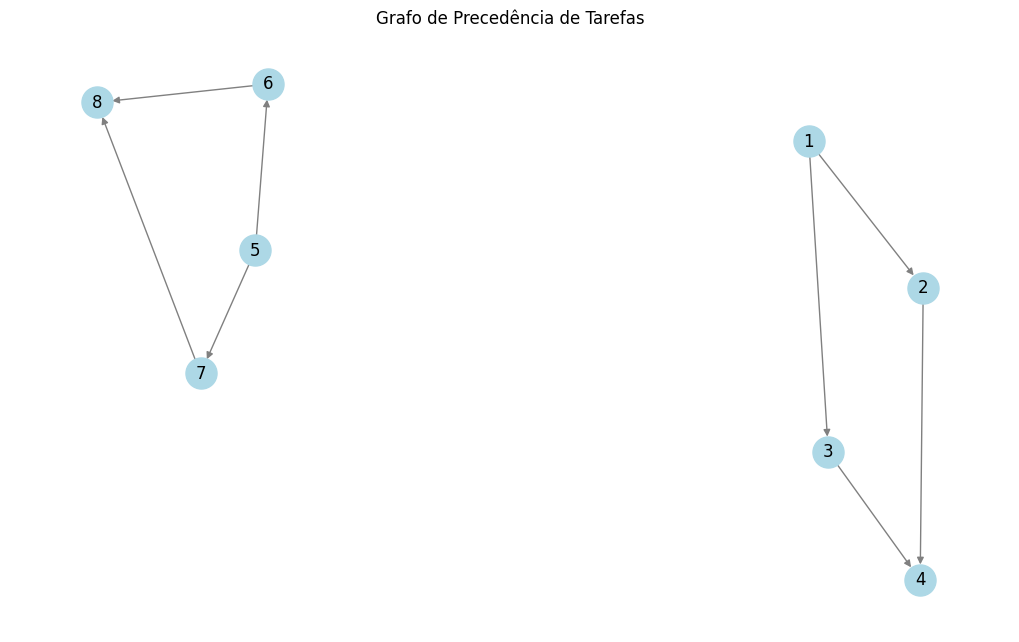

In [42]:
# Caminho para o arquivo de configuração
file_path = '8.txt'

# Cria uma instância do ProjectScheduler
scheduler = ProjectScheduler(file_path)

# Mostra resumo do projeto
print("Resumo do Projeto:")
print(scheduler.get_project_summary())

# Mostra relações de precedência
print("\nRelações de Precedência:")
precedence_relations = scheduler.get_job_precedence()
print(precedence_relations)

# Mostra detalhes das tarefas
print("\nDetalhes das Tarefas:")
print(scheduler.get_job_details())

# Cria e mostra o grafo de precedência
create_project_graph(precedence_relations)

In [43]:


class ProjectScheduler:
    def __init__(self, file_path):
        self.data = {
            'projects': 0,
            'jobs': 0,
            'horizon': 0,
            'resources': {'renewable': 0, 'nonrenewable': 0},
            'precedence_relations': {},
            'job_details': {},
            'resource_availability': {}
        }
        self.parse_file(file_path)
    
    def parse_file(self, file_path):
        with open(file_path, 'r') as file:
            content = file.read()
        
        # Parse general information
        self.data['projects'] = int(re.search(r'projects:\s*(\d+)', content).group(1))
        self.data['jobs'] = int(re.search(r'jobs \(incl\. supersource/sink \):\s*(\d+)', content).group(1))
        self.data['horizon'] = int(re.search(r'horizon:\s*(\d+)', content).group(1))
        
        # Parse resources
        resources_match = re.search(r'RESOURCES\n  - renewable\s*:\s*(\d+)\s*R\n  - nonrenewable\s*:\s*(\d+)\s*N', content)
        self.data['resources']['renewable'] = int(resources_match.group(1))
        self.data['resources']['nonrenewable'] = int(resources_match.group(2))
        
        # Parse precedence relations corrigido
        precedence_section = re.search(r'#Precedence relations(.*?)#Duration', content, re.DOTALL)
        if precedence_section:
            for line in precedence_section.group(1).strip().split('\n')[1:]:
                parts = line.split()
                if len(parts) > 3:  # Garante que há successors
                    job_nr = int(parts[0])
                    successors = [int(succ) for succ in parts[3:]]  # Usa parts[3:] para successors
                    self.data['precedence_relations'][job_nr] = successors
        
        # Parse job details
        duration_section = re.search(r'#Duration and resources(.*?)#Resource', content, re.DOTALL)
        if duration_section:
            for line in duration_section.group(1).strip().split('\n')[1:]:
                parts = line.split()
                if len(parts) > 2:
                    job_nr = int(parts[0])
                    duration = int(parts[2])
                    resources = {f'R{i+1}': int(parts[3+i]) for i in range(2)}
                    self.data['job_details'][job_nr] = {
                        'duration': duration,
                        'resources': resources
                    }
        
        # Parse resource availability
        availability_section = re.search(r'#Resource availability(.*)', content, re.DOTALL)
        if availability_section:
            for line in availability_section.group(1).strip().split('\n')[1:]:
                parts = line.split()
                if len(parts) > 1:
                    resource = parts[0]
                    quantity = int(parts[1])
                    self.data['resource_availability'][resource] = quantity

class SchedulingAStar:
    def __init__(self, scheduler: ProjectScheduler):
        self.precedence_relations = scheduler.data['precedence_relations']
        self.job_details = scheduler.data['job_details']
        self.resource_availability = scheduler.data['resource_availability']
        self.total_jobs = scheduler.data['jobs']
        self.horizon = scheduler.data['horizon']
    
    def is_valid_schedule(self, schedule: List[int]) -> bool:
        # Verifica restrições de precedência
        time_slots = {}  # Quando cada tarefa começa
        end_times = {}   # Quando cada tarefa termina
        
        for time, job in enumerate(schedule):
            if job == 0:  # Slot vazio
                continue
                
            # Verifica predecessores
            for pred_job, successors in self.precedence_relations.items():
                if job in successors:  # job é sucessor de pred_job
                    if pred_job not in end_times:  # predecessor não foi agendado
                        return False
                    if time < end_times[pred_job]:  # predecessor não terminou
                        return False
            
            duration = self.job_details[job]['duration']
            time_slots[job] = time
            end_times[job] = time + duration
            
            # Verifica horizonte de tempo
            if end_times[job] > self.horizon:
                return False
        
        # Verifica recursos em cada momento
        for t in range(self.horizon):
            resource_usage = {'R1': 0, 'R2': 0}
            for job in time_slots.keys():
                if time_slots[job] <= t < end_times[job]:  # tarefa está ativa
                    for resource, amount in self.job_details[job]['resources'].items():
                        resource_usage[resource] += amount
            
            # Verifica se excede recursos disponíveis
            for resource, usage in resource_usage.items():
                if usage > self.resource_availability[resource]:
                    return False
                    
        return True
    
    def heuristic(self, schedule: List[int]) -> int:
        # Heurística baseada em tarefas não agendadas e recursos
        scheduled_jobs = set(j for j in schedule if j != 0)
        remaining_jobs = self.total_jobs - len(scheduled_jobs)
        
        # Estima tempo mínimo necessário para tarefas restantes
        min_remaining_time = 0
        for job in range(1, self.total_jobs + 1):
            if job not in scheduled_jobs:
                min_remaining_time += self.job_details[job]['duration']
                
        return min_remaining_time + remaining_jobs
    
    def get_successors(self, schedule: List[int]) -> List[List[int]]:
        successors = []
        if len(schedule) >= self.horizon:
            return successors
            
        # Encontra tarefas que podem ser agendadas
        scheduled_jobs = set(j for j in schedule if j != 0)
        available_jobs = set()
        
        for job in range(1, self.total_jobs + 1):
            if job not in scheduled_jobs:
                can_schedule = True
                # Verifica predecessores
                for pred_job, succ_jobs in self.precedence_relations.items():
                    if job in succ_jobs and pred_job not in scheduled_jobs:
                        can_schedule = False
                        break
                if can_schedule:
                    available_jobs.add(job)
        
        # Gera sucessores incluindo slot vazio
        available_jobs.add(0)  # Adiciona opção de não agendar nada
        for job in available_jobs:
            new_schedule = schedule + [job]
            if self.is_valid_schedule(new_schedule):
                successors.append(new_schedule)
                
        return successors
    
    def a_star_search(self) -> List[int]:
        initial_state = []
        
        open_list = [(0, initial_state)]
        heapq.heapify(open_list)
        
        closed_set = set()
        
        while open_list:
            _, current_schedule = heapq.heappop(open_list)
            
            # Verifica se todas as tarefas foram agendadas
            scheduled_jobs = set(j for j in current_schedule if j != 0)
            if len(scheduled_jobs) == self.total_jobs:
                return current_schedule
            
            schedule_key = tuple(current_schedule)
            if schedule_key in closed_set:
                continue
                
            closed_set.add(schedule_key)
            
            # Gera e avalia sucessores
            for successor in self.get_successors(current_schedule):
                g_cost = len(successor)  # Custo do caminho
                h_cost = self.heuristic(successor)
                f_cost = g_cost + h_cost
                
                heapq.heappush(open_list, (f_cost, successor))
        
        return None

# Uso com arquivo
a_star = SchedulingAStar(scheduler)
solution = a_star.a_star_search()

if solution:
    print("\nSolução encontrada:")
    print("Ordem de execução das tarefas:", [j for j in solution if j != 0])
    
    # Visualiza o resultado
    time_slots = {}
    for time, job in enumerate(solution):
        if job != 0:
            time_slots[job] = time
    
    print("\nInício de cada tarefa:")
    for job, start_time in sorted(time_slots.items()):
        duration = scheduler.data['job_details'][job]['duration']
        print(f"Tarefa {job}: começa no tempo {start_time}, duração {duration}")
else:
    print("Não foi possível encontrar uma solução válida.")


Solução encontrada:
Ordem de execução das tarefas: [1, 3, 2, 5, 7, 4, 6, 8]

Início de cada tarefa:
Tarefa 1: começa no tempo 0, duração 2
Tarefa 2: começa no tempo 3, duração 3
Tarefa 3: começa no tempo 2, duração 4
Tarefa 4: começa no tempo 7, duração 1
Tarefa 5: começa no tempo 4, duração 2
Tarefa 6: começa no tempo 8, duração 3
Tarefa 7: começa no tempo 6, duração 4
Tarefa 8: começa no tempo 11, duração 1


Resumo do Projeto:
{'Total Projects': 1, 'Total Jobs': 12, 'Time Horizon': 46, 'Renewable Resources': 2, 'Resource Availability': {'R1': 6, 'R2': 4}}

Relações de Precedência:
{1: [2, 3, 4], 2: [5, 6], 3: [10, 11], 4: [9], 5: [7, 8], 6: [10, 11], 7: [9, 10], 8: [9], 9: [12], 10: [12], 11: [12]}

Detalhes das Tarefas:
{1: {'duration': 0, 'resources': {'R1': 0, 'R2': 0}}, 2: {'duration': 3, 'resources': {'R1': 6, 'R2': 2}}, 3: {'duration': 1, 'resources': {'R1': 0, 'R2': 0}}, 4: {'duration': 8, 'resources': {'R1': 4, 'R2': 0}}, 5: {'duration': 4, 'resources': {'R1': 0, 'R2': 4}}, 6: {'duration': 4, 'resources': {'R1': 0, 'R2': 4}}, 7: {'duration': 6, 'resources': {'R1': 2, 'R2': 0}}, 8: {'duration': 4, 'resources': {'R1': 4, 'R2': 2}}, 9: {'duration': 5, 'resources': {'R1': 3, 'R2': 0}}, 10: {'duration': 7, 'resources': {'R1': 2, 'R2': 1}}, 11: {'duration': 4, 'resources': {'R1': 0, 'R2': 3}}, 12: {'duration': 0, 'resources': {'R1': 0, 'R2': 0}}}


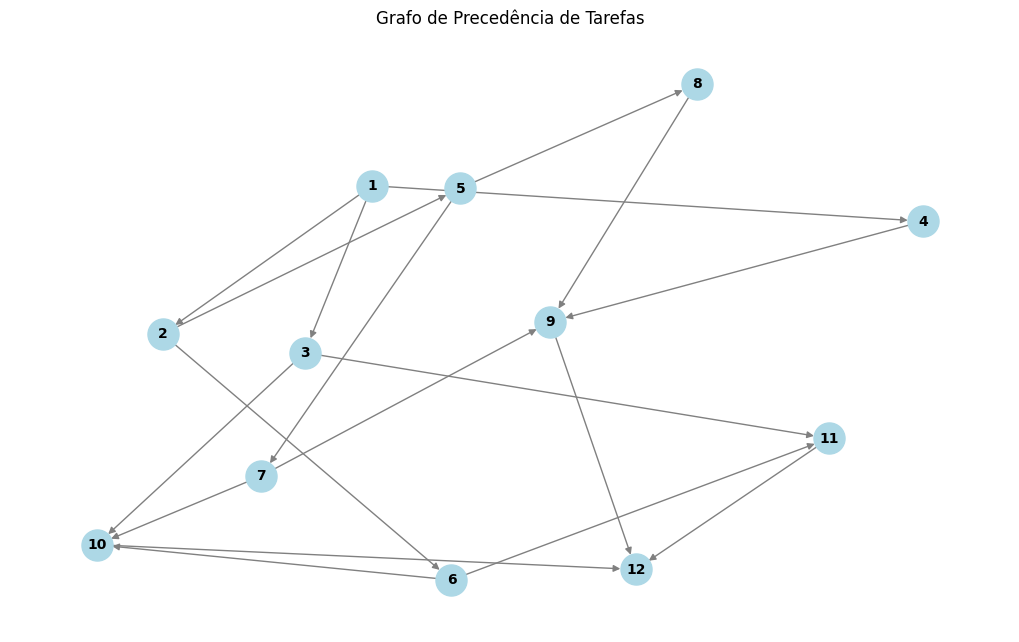

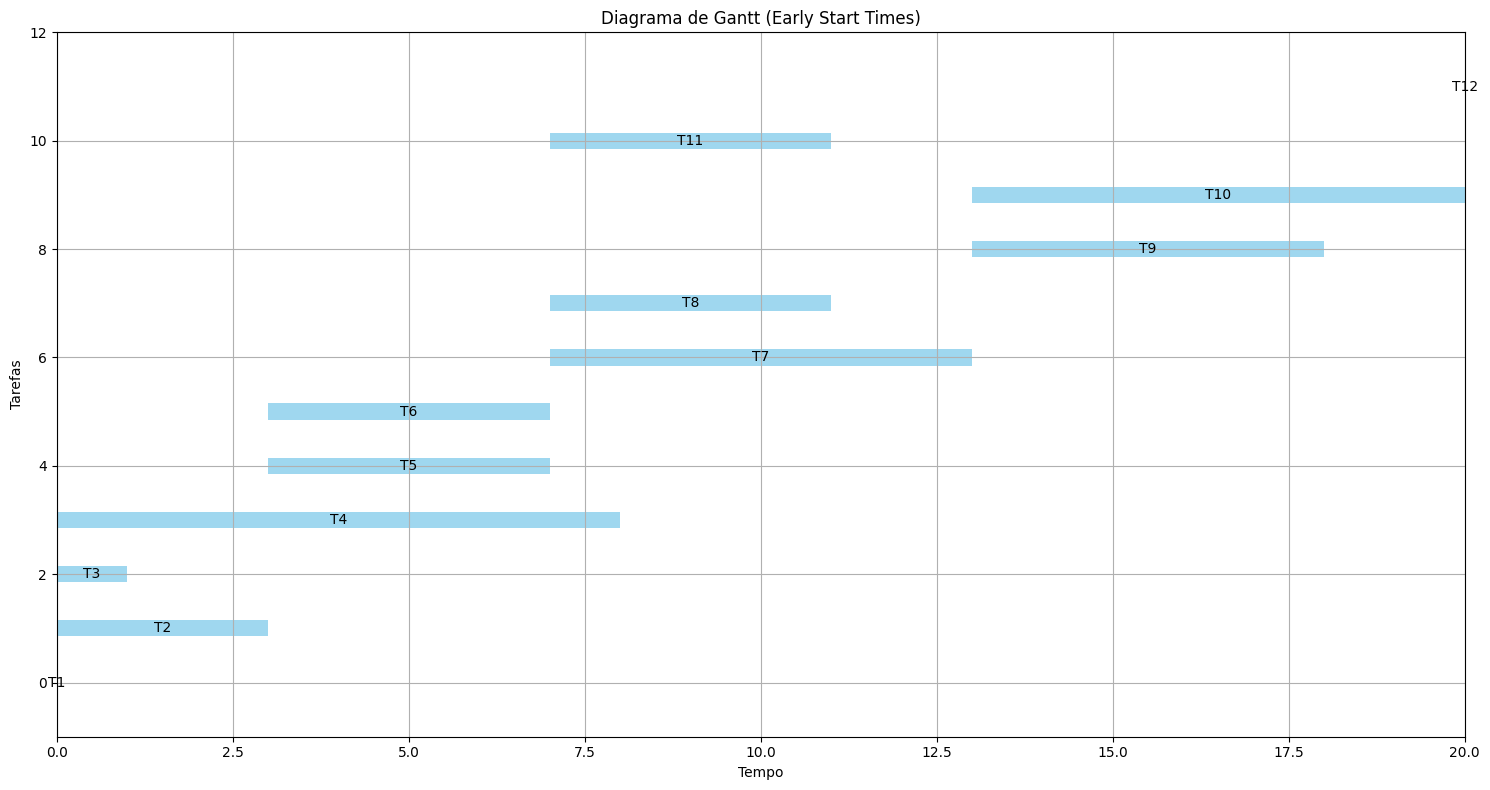

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

class ProjectScheduler:
    def __init__(self, file_path):
        self.data = {
            'projects': 0,
            'jobs': 0,
            'horizon': 0,
            'resources': {'renewable': 0, 'nonrenewable': 0},
            'precedence_relations': {},
            'job_details': {},
            'resource_availability': {}
        }
        try:
            self.parse_file(file_path)
            self.graph = self._create_graph()
        except Exception as e:
            print(f"Erro ao inicializar o ProjectScheduler: {str(e)}")
            raise
    
    def parse_file(self, file_path):
        try:
            with open(file_path, 'r') as file:
                content = file.read()
                
            # Parse general information
            sections = content.split('************************************************************************')
            
            # Parsing general information
            general_info = sections[1]
            projects_match = re.search(r'projects\s*:\s*(\d+)', general_info)
            jobs_match = re.search(r'jobs.*:\s*(\d+)', general_info)
            horizon_match = re.search(r'horizon\s*:\s*(\d+)', general_info)
            
            if not all([projects_match, jobs_match, horizon_match]):
                raise ValueError("Não foi possível encontrar informações gerais no arquivo")
            
            self.data['projects'] = int(projects_match.group(1))
            self.data['jobs'] = int(jobs_match.group(1))
            self.data['horizon'] = int(horizon_match.group(1))
            
            # Parse resources
            resources_match = re.search(r'- renewable\s*:\s*(\d+).*\n*.*- nonrenewable\s*:\s*(\d+)', general_info)
            if resources_match:
                self.data['resources']['renewable'] = int(resources_match.group(1))
                self.data['resources']['nonrenewable'] = int(resources_match.group(2))
            
            # Parse precedence relations
            precedence_section = None
            for section in sections:
                if '#Precedence relations' in section:
                    precedence_section = section
                    break
            
            if precedence_section:
                lines = precedence_section.strip().split('\n')
                for line in lines:
                    if line.strip() and not line.startswith('#'):
                        parts = line.split()
                        if len(parts) >= 4:  # job_nr, modes, num_successors, successors...
                            job_nr = int(parts[0])
                            successors = [int(x) for x in parts[3:]]
                            self.data['precedence_relations'][job_nr] = successors
            
            # Parse job details
            duration_section = None
            for section in sections:
                if '#Duration' in section:
                    duration_section = section
                    break
            
            if duration_section:
                lines = duration_section.strip().split('\n')
                for line in lines:
                    if line.strip() and not line.startswith('#'):
                        parts = line.split()
                        if len(parts) >= 4:  # job_nr, mode, duration, resources...
                            job_nr = int(parts[0])
                            duration = int(parts[2])
                            resources = {}
                            for i, resource_value in enumerate(parts[3:]):
                                resources[f'R{i+1}'] = int(resource_value)
                            self.data['job_details'][job_nr] = {
                                'duration': duration,
                                'resources': resources
                            }
            
            # Parse resource availability
            availability_section = None
            for section in sections:
                if '#Resource availability' in section:
                    availability_section = section
                    break
            
            if availability_section:
                lines = availability_section.strip().split('\n')
                for line in lines:
                    if line.strip() and not line.startswith('#'):
                        parts = line.split()
                        if len(parts) >= 2:
                            resource = parts[0]
                            quantity = int(parts[1])
                            self.data['resource_availability'][resource] = quantity
                            
        except FileNotFoundError:
            raise FileNotFoundError(f"Arquivo não encontrado: {file_path}")
        except Exception as e:
            raise Exception(f"Erro ao fazer parse do arquivo: {str(e)}")

    def _create_graph(self):
        """Cria um grafo direcionado baseado nas relações de precedência"""
        G = nx.DiGraph()
        
        # Adiciona nós com seus atributos
        for job_id, details in self.data['job_details'].items():
            G.add_node(job_id, **details)
        
        # Adiciona arestas baseadas nas relações de precedência
        for pred, successors in self.data['precedence_relations'].items():
            for succ in successors:
                G.add_edge(pred, succ)
                
        return G
    
    def get_project_summary(self):
        """Retorna um resumo do projeto"""
        return {
            'Total Projects': self.data['projects'],
            'Total Jobs': self.data['jobs'],
            'Time Horizon': self.data['horizon'],
            'Renewable Resources': self.data['resources']['renewable'],
            'Resource Availability': self.data['resource_availability']
        }
    
    def get_job_precedence(self):
        """Retorna as relações de precedência"""
        return self.data['precedence_relations']
    
    def get_job_details(self):
        """Retorna os detalhes das tarefas"""
        return self.data['job_details']

    def plot_precedence_graph(self):
        """Plota o grafo de precedência com layout melhorado"""
        try:
            # Configura o layout do grafo
            pos = nx.spring_layout(self.graph, k=0.5, iterations=50)
            
            # Criar nova figura
            plt.figure(figsize=(10, 6))
            
            # Desenha o grafo
            nx.draw(self.graph, pos, 
                    with_labels=True,
                    node_color='lightblue',
                    node_size=500,
                    arrows=True,
                    edge_color='gray',
                    font_size=10,
                    font_weight='bold')
            
            # Adiciona título
            plt.title("Grafo de Precedência de Tarefas")
            plt.show()
        except Exception as e:
            print(f"Erro ao plotar o grafo: {str(e)}")

    def plot_gantt_chart(self):
        """Plota um diagrama de Gantt básico"""
        try:
            # Calcula os early start times usando topological sort
            early_start = {node: 0 for node in self.graph.nodes()}
            for node in nx.topological_sort(self.graph):
                predecessors = list(self.graph.predecessors(node))
                if predecessors:
                    early_start[node] = max(early_start[p] + self.data['job_details'][p]['duration'] 
                                        for p in predecessors)

            # Configuração do plot
            fig, ax = plt.subplots(figsize=(15, 8))
            
            # Plota as barras para cada tarefa
            for i, task in enumerate(self.data['job_details'].keys()):
                start = early_start[task]
                duration = self.data['job_details'][task]['duration']
                ax.barh(i, duration, left=start, height=0.3, 
                       align='center', color='skyblue', alpha=0.8)
                
                # Adiciona o número da tarefa
                ax.text(start + duration/2, i, f'T{task}',
                       ha='center', va='center')

            # Configuração do layout
            ax.set_ylim(-1, len(self.data['job_details']))
            ax.set_xlabel('Tempo')
            ax.set_ylabel('Tarefas')
            ax.set_title('Diagrama de Gantt (Early Start Times)')
            ax.grid(True)
            
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Erro ao plotar o diagrama de Gantt: {str(e)}")

def main():
    try:
        # Caminho para o arquivo de configuração
        file_path = '10.txt'  # Ajuste o caminho conforme necessário

        # Cria uma instância do ProjectScheduler
        scheduler = ProjectScheduler(file_path)

        # Mostra resumo do projeto
        print("Resumo do Projeto:")
        print(scheduler.get_project_summary())

        # Mostra relações de precedência
        print("\nRelações de Precedência:")
        print(scheduler.get_job_precedence())

        # Mostra detalhes das tarefas
        print("\nDetalhes das Tarefas:")
        print(scheduler.get_job_details())

        # Plota o grafo de precedência
        scheduler.plot_precedence_graph()

        # Plota o diagrama de Gantt
        scheduler.plot_gantt_chart()
        
    except Exception as e:
        print(f"Erro na execução do programa: {str(e)}")

if __name__ == "__main__":
    main()